# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

#create blank lists for data
returned_city=[]          
lat=[]           
lng=[]          
max_temp=[]      
humidity=[]     
cloudiness=[]    
wind_speed=[]    
country=[]       
date=[]          


# Loop through the list of cities and perform a request for data on each
count=0
missing=0
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json() 
#     print(response)
#     if (count>10): break
    try:
        
        returned_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1
        print(f'Processing Recored {count} of {len(cities)} | {city}') 
    except:
        missing+=1
        print(f'City not found. Skipping, total not found = {missing}')

    time.sleep(3)
      

City not found. Skipping, total not found = 1
Processing Recored 1 of 623 | rikitea
Processing Recored 2 of 623 | port augusta
Processing Recored 3 of 623 | sao miguel do araguaia
Processing Recored 4 of 623 | alofi
Processing Recored 5 of 623 | lebu
Processing Recored 6 of 623 | ahuimanu
Processing Recored 7 of 623 | tenenkou
Processing Recored 8 of 623 | mana
Processing Recored 9 of 623 | albany
Processing Recored 10 of 623 | codrington
Processing Recored 11 of 623 | butaritari
City not found. Skipping, total not found = 2
Processing Recored 12 of 623 | cap malheureux
Processing Recored 13 of 623 | kawambwa
Processing Recored 14 of 623 | hami
Processing Recored 15 of 623 | georgetown
Processing Recored 16 of 623 | gualaceo
Processing Recored 17 of 623 | bengkulu
City not found. Skipping, total not found = 3
City not found. Skipping, total not found = 4
City not found. Skipping, total not found = 5
Processing Recored 18 of 623 | sansimion
Processing Recored 19 of 623 | san patricio
Pr

City not found. Skipping, total not found = 30
Processing Recored 168 of 623 | tuatapere
Processing Recored 169 of 623 | esperance
Processing Recored 170 of 623 | raudeberg
Processing Recored 171 of 623 | verkhnyaya maksakovka
Processing Recored 172 of 623 | mahebourg
Processing Recored 173 of 623 | tukan
Processing Recored 174 of 623 | chapais
Processing Recored 175 of 623 | souillac
Processing Recored 176 of 623 | mateare
Processing Recored 177 of 623 | saint-denis
Processing Recored 178 of 623 | bintulu
Processing Recored 179 of 623 | tezu
Processing Recored 180 of 623 | pangnirtung
Processing Recored 181 of 623 | songjianghe
City not found. Skipping, total not found = 31
Processing Recored 182 of 623 | chabahar
Processing Recored 183 of 623 | lamar
Processing Recored 184 of 623 | boa vista
Processing Recored 185 of 623 | saldanha
Processing Recored 186 of 623 | honiara
Processing Recored 187 of 623 | salinas
Processing Recored 188 of 623 | ta khmau
Processing Recored 189 of 623 | c

Processing Recored 355 of 623 | houma
Processing Recored 356 of 623 | ngaoundere
City not found. Skipping, total not found = 41
Processing Recored 357 of 623 | nantucket
Processing Recored 358 of 623 | naze
City not found. Skipping, total not found = 42
City not found. Skipping, total not found = 43
Processing Recored 359 of 623 | faanui
City not found. Skipping, total not found = 44
Processing Recored 360 of 623 | zhigansk
Processing Recored 361 of 623 | alta floresta
Processing Recored 362 of 623 | north bend
Processing Recored 363 of 623 | birao
Processing Recored 364 of 623 | barcelos
Processing Recored 365 of 623 | mersing
Processing Recored 366 of 623 | santa isabel do rio negro
Processing Recored 367 of 623 | namatanai
Processing Recored 368 of 623 | taoudenni
Processing Recored 369 of 623 | pochutla
Processing Recored 370 of 623 | rocha
Processing Recored 371 of 623 | geraldton
Processing Recored 372 of 623 | havelock
Processing Recored 373 of 623 | killam
Processing Recored 37

Processing Recored 539 of 623 | ahmadabad
Processing Recored 540 of 623 | mareeba
Processing Recored 541 of 623 | komsomolskiy
Processing Recored 542 of 623 | manicore
Processing Recored 543 of 623 | yilan
Processing Recored 544 of 623 | valdivia
Processing Recored 545 of 623 | oskemen
Processing Recored 546 of 623 | nouadhibou
City not found. Skipping, total not found = 54
Processing Recored 547 of 623 | doha
City not found. Skipping, total not found = 55
Processing Recored 548 of 623 | sorong
Processing Recored 549 of 623 | akyab
Processing Recored 550 of 623 | roald
Processing Recored 551 of 623 | maridi
Processing Recored 552 of 623 | tambacounda
Processing Recored 553 of 623 | catio
Processing Recored 554 of 623 | bairiki
Processing Recored 555 of 623 | guerrero negro
City not found. Skipping, total not found = 56
Processing Recored 556 of 623 | baghmara
Processing Recored 557 of 623 | bolkhov
Processing Recored 558 of 623 | sungairaya
Processing Recored 559 of 623 | wajima
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
weather_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()
weather_data.to_csv('../output_data/Exported_weather_data.csv')

In [5]:
weather_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Rikitea,-23.12,-134.97,20.80,80,12,9.84,PF,1595703320
1,Port Augusta,-32.50,137.77,9.00,93,90,1.50,AU,1595703423
2,São Miguel do Araguaia,-13.28,-50.16,33.23,25,0,1.87,BR,1595703426
3,Alofi,-19.06,-169.92,22.00,83,18,4.10,NU,1595703429
4,Lebu,-37.62,-73.65,11.09,83,100,9.58,CL,1595703323


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,17.774240,19.637456,21.212862,70.863958,50.793286,3.681608,1.595704e+09
std,32.716799,90.892027,7.746170,20.077572,39.789553,2.468785,5.734345e+02
min,-54.800000,-179.170000,-1.000000,7.000000,0.000000,0.140000,1.595703e+09
25%,-8.990000,-60.280000,15.530000,58.000000,5.000000,1.852500,1.595704e+09
50%,18.415000,24.705000,22.040000,76.000000,47.500000,3.100000,1.595704e+09
75%,46.470000,98.522500,27.000000,87.000000,90.000000,5.100000,1.595705e+09
max,78.220000,178.420000,43.100000,100.000000,100.000000,13.900000,1.595705e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
print(f'Max humidity is {weather_data["Humidity"].max()}')

Max humidity is 100


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

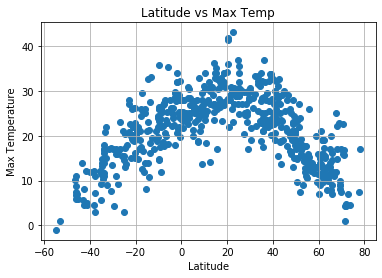

In [67]:
plt.scatter(weather_data["Lat"], weather_data["Max_Temp"])
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.savefig('../output_data/Lat_vs_Temp.png')

## Latitude vs. Humidity Plot

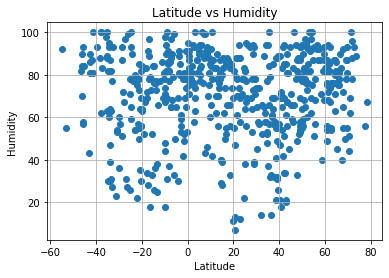

In [68]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('../output_data/Lat_vs_Humidity.png')

## Latitude vs. Cloudiness Plot

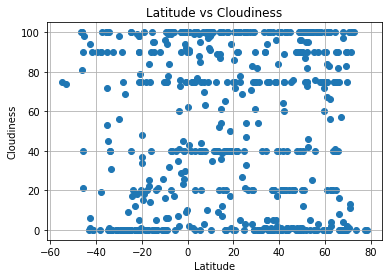

In [69]:
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.savefig('../output_data/Lat_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

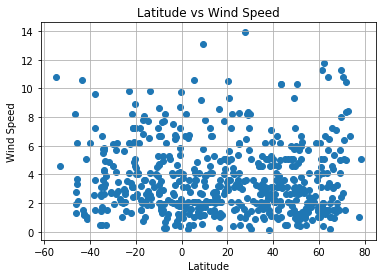

In [70]:
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.scatter(weather_data["Lat"], weather_data["Wind_Speed"])
plt.savefig('../output_data/Lat_vs_Wind_Speed.png')

## Linear Regression

 the rsquared value is 0.4781728381344484


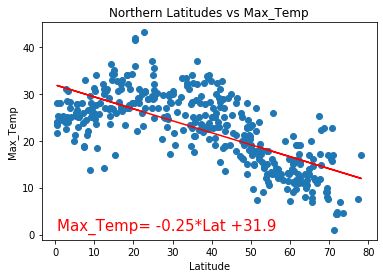

 the rsquared value is 5.100674670519539e-06


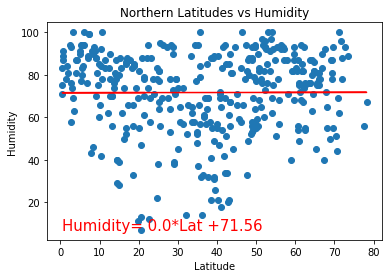

 the rsquared value is 0.007678909681944607


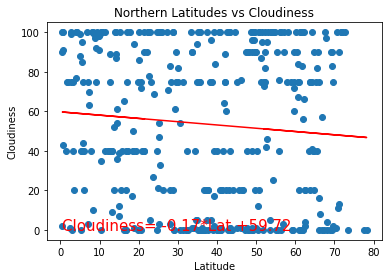

 the rsquared value is 0.0018040149614543003


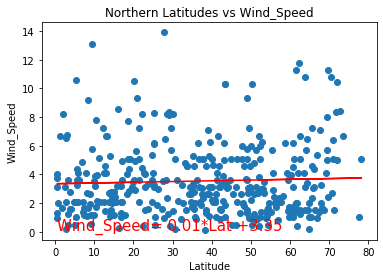

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots
plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
north=weather_data.loc[(weather_data['Lat']>=0)]
xvalue=north['Lat']

#for loop here to change yvalue
for each_variable in yvalues:
    
    yvalue=north[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
    plt.title(f'Northern Latitudes vs {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()



 the rsquared value is 0.599693957803123


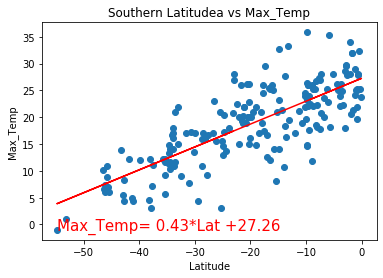

 the rsquared value is 0.0025001784709585517


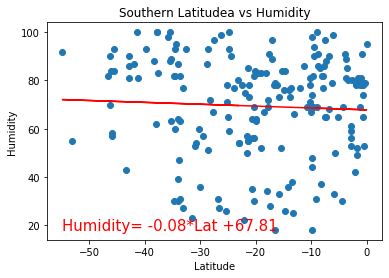

 the rsquared value is 0.007589134435304072


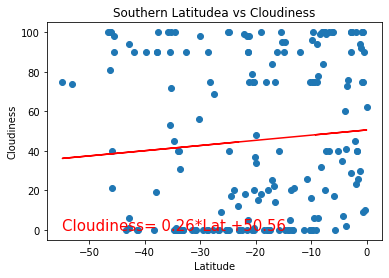

 the rsquared value is 0.0001483930934091082


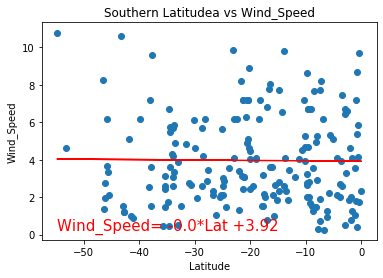

In [37]:
plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
south=weather_data.loc[(weather_data['Lat']<=0)]
xvalue=south['Lat']

#for loop here to change yvalue
for each_variable in yvalues:
    
    yvalue=south[each_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regress_values = xvalue * slope + intercept
    line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,regress_values,"r-")
    plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(each_variable)
    plt.title(f'Southern Latitudea vs {each_variable}')
    print(f" the rsquared value is {rvalue**2}")
    plt.show()

In [51]:
# Create Northern and Southern Hemisphere DataFrames
north=weather_data.loc[(weather_data['Lat']>=0)]
xvaluen=north['Lat']
south=weather_data.loc[(weather_data['Lat']<0)]
xvalues=south['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 the rsquared value is 0.4781728381344484


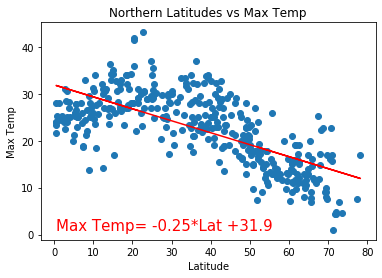

For ever increase in Latitude towards the North Pole the Max Temp drop by a 1/4 of a degree


<Figure size 432x288 with 0 Axes>

In [71]:
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvalue=north['Lat']

    
yvalue=north['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Northern Latitudes vs Max Temp')
print(f" the rsquared value is {rvalue**2}")
plt.show()
print('For ever increase in Latitude towards the North Pole the Max Temp drop by a 1/4 of a degree')
plt.savefig('../output_data/Northern_Lat_vs_Max_Temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 the rsquared value is 0.599693957803123


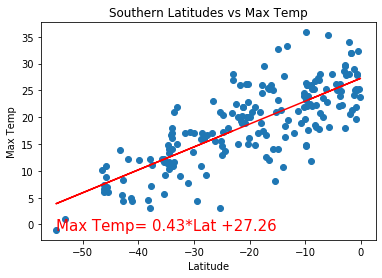

As you move towards the equater the Max Temp increases by almost 1/2 a degree for each Latitude


<Figure size 432x288 with 0 Axes>

In [72]:
yvalue=south['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Southern Latitudes vs Max Temp')
print(f" the rsquared value is {rvalue**2}")
plt.show()
print('As you move towards the equater the Max Temp increases by almost 1/2 a degree for each Latitude')
plt.savefig('../output_data/Southern_Lat_vs_Max_Temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 the rsquared value is 5.100674670519539e-06


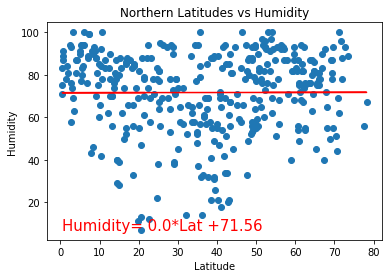

Humidity and Latitude do not have a correlation


<Figure size 432x288 with 0 Axes>

In [73]:
yvalue=north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Latitudes vs Humidity')
print(f" the rsquared value is {rvalue**2}")
plt.show()
print('Humidity and Latitude do not have a correlation')
plt.savefig('../output_data/Northern_Lat_vs_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 the rsquared value is 0.0025001784709585517


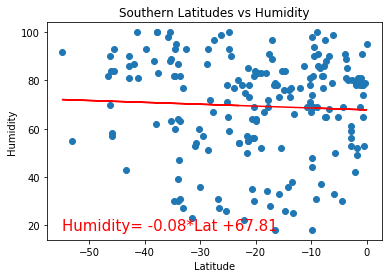

Humidity and Latitude do not have a correlation


<Figure size 432x288 with 0 Axes>

In [74]:
yvalue=south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Latitudes vs Humidity')
print(f" the rsquared value is {rvalue**2}")
plt.show()
print('Humidity and Latitude do not have a correlation')
plt.savefig('../output_data/Southern_Lat_vs_Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 the rsquared value is 0.007678909681944607


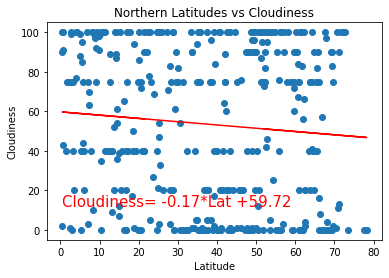

There is a slight decress in Cloudiness as you move North


<Figure size 432x288 with 0 Axes>

In [75]:
yvalue=north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Latitudes vs Cloudiness')
print(f" the rsquared value is {rvalue**2}")
plt.show()
print('There is a slight decress in Cloudiness as you move North')
plt.savefig('../output_data/Northern_Lat_vs_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 the rsquared value is 0.007589134435304072


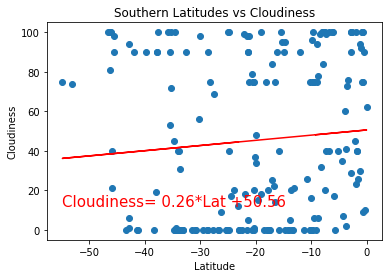

Slight incress in % Cloudiness as you move towards the equator


<Figure size 432x288 with 0 Axes>

In [76]:
yvalue=south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Latitudes vs Cloudiness')
print(f" the rsquared value is {rvalue**2}")
plt.show()
print('Slight incress in % Cloudiness as you move towards the equator')
plt.savefig('../output_data/Southern_Lat_vs_Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 the rsquared value is 0.0018040149614543003


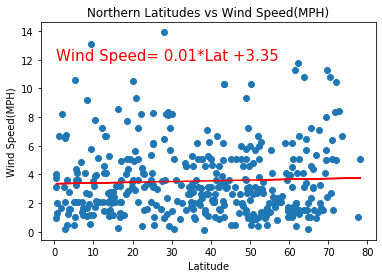

There is very little correlation between Latitude and Wind Speed


<Figure size 432x288 with 0 Axes>

In [77]:
yvalue=north['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
regress_values = xvaluen * slope + intercept
line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvaluen,yvalue)
plt.plot(xvaluen,regress_values,"r-")
plt.annotate(line_eq,(xvaluen.min(),12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.title(f'Northern Latitudes vs Wind Speed(MPH)')
print(f" the rsquared value is {rvalue**2}")
plt.show()
print('There is very little correlation between Latitude and Wind Speed')
plt.savefig('../output_data/Northern_Lat_vs_Wind_Speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 the rsquared value is 0.0001483930934091082


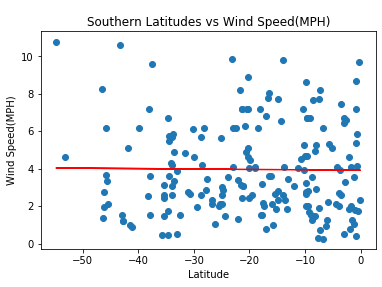

There is very little correlation between Latitude and Wind Speed


<Figure size 432x288 with 0 Axes>

In [79]:
yvalue=south['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
regress_values = xvalues * slope + intercept
line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
plt.scatter(xvalues,yvalue)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(xvalues.min(),12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.title(f'Southern Latitudes vs Wind Speed(MPH)')
print(f" the rsquared value is {rvalue**2}")
plt.show()
print('There is very little correlation between Latitude and Wind Speed')
plt.savefig('../output_data/Southern_Lat_vs_Wind_Speed.png')